# REDDIT  ANALYSIS

# IMPORTING THE LIBRARIES

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [121]:
#reading data
data=pd.read_csv("/kaggle/input/post-data-x1/Pst data - Copy of Set of work 2 - Sheet1.csv.csv")



In [122]:
data 

,clean_post,category
0,My brother in-law (Sammy) lost his home shortl...,-1.0
1,Iâve enjoyed reading and posting on this sub...,0.0
2,"I'm back like I said I would be,. My [original...",-1.0
3,I'll try to keep this short. I had a [1967 Imp...,-1.0
4,I want to sincerely thank everyone who comment...,-1.0
...,...,...
12843,every channel showing different numbers what t...,-1.0
12844,regardless who won bit pathetic that lalu emer...,-1.0
12845,let get over with least will live peace for so...,-1.0
12846,holy cow fucking fuck bjp jdu 171 paraphrase s...,-1.0


In [123]:
data.head(20)

,clean_post,category
0,My brother in-law (Sammy) lost his home shortl...,-1.0
1,Iâve enjoyed reading and posting on this sub...,0.0
2,"I'm back like I said I would be,. My [original...",-1.0
3,I'll try to keep this short. I had a [1967 Imp...,-1.0
4,I want to sincerely thank everyone who comment...,-1.0
5,I am a high schooler with a weekend job at a c...,1.0
6,"Hello, everyone. First of all, thank you all f...",-1.0
7,"Note. My step-daughter, Madeline, was about a ...",0.0
8,We had a family dinner this evening. My family...,-1.0
9,Iâve become frustrated with how quick a lot ...,1.0


In [124]:
data.value_counts()

clean_post                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [125]:
data.describe()

,category
count,12848.000000
mean,0.124455
std,0.852197
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


In [126]:
data.columns

Index(['clean_post', 'category'], dtype='object')

In [127]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,12848.0,0.124455,0.852197,-1.0,-1.0,0.0,1.0,1.0


In [128]:
data.isnull().sum()

clean_post    1
category      0
dtype: int64

In [129]:
data.dropna(axis = 0, inplace = True)

In [130]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [131]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [132]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [133]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [134]:
data

,clean_post,category
0,4615,-1.0
1,4159,0.0
2,3455,-1.0
3,3397,-1.0
4,3230,-1.0
...,...,...
12843,8394,-1.0
12844,10273,-1.0
12845,9398,-1.0
12846,8841,-1.0


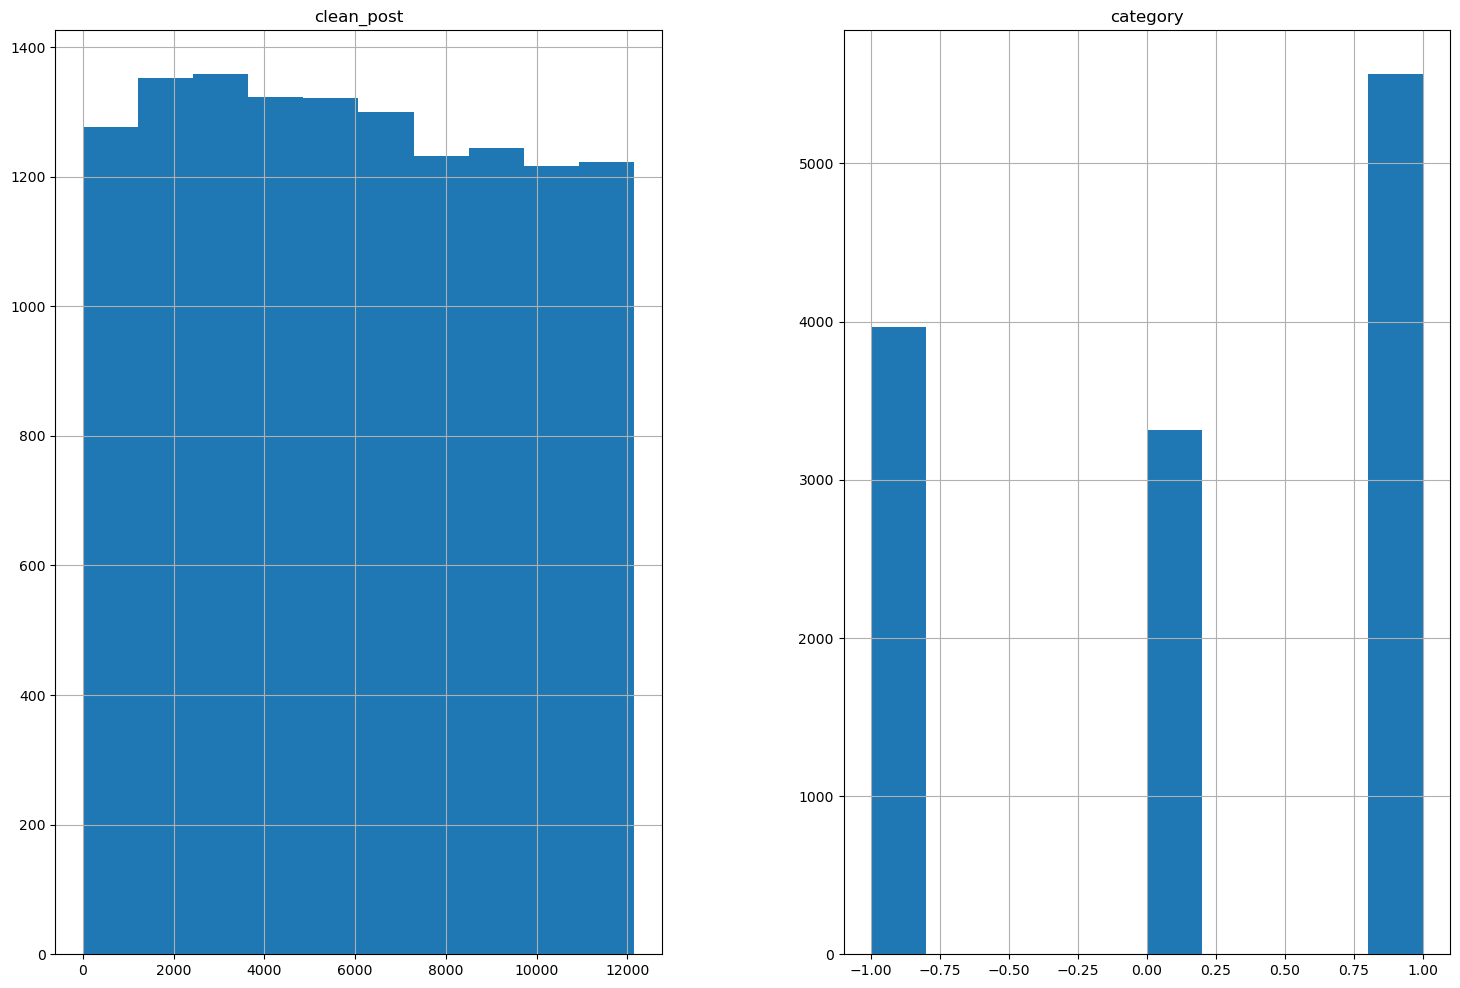

In [135]:
data.hist(figsize=(18,12))
plt.show()


In [136]:
data.corr()

,clean_post,category
clean_post,1.000000,-0.285263
category,-0.285263,1.000000


<Axes: >

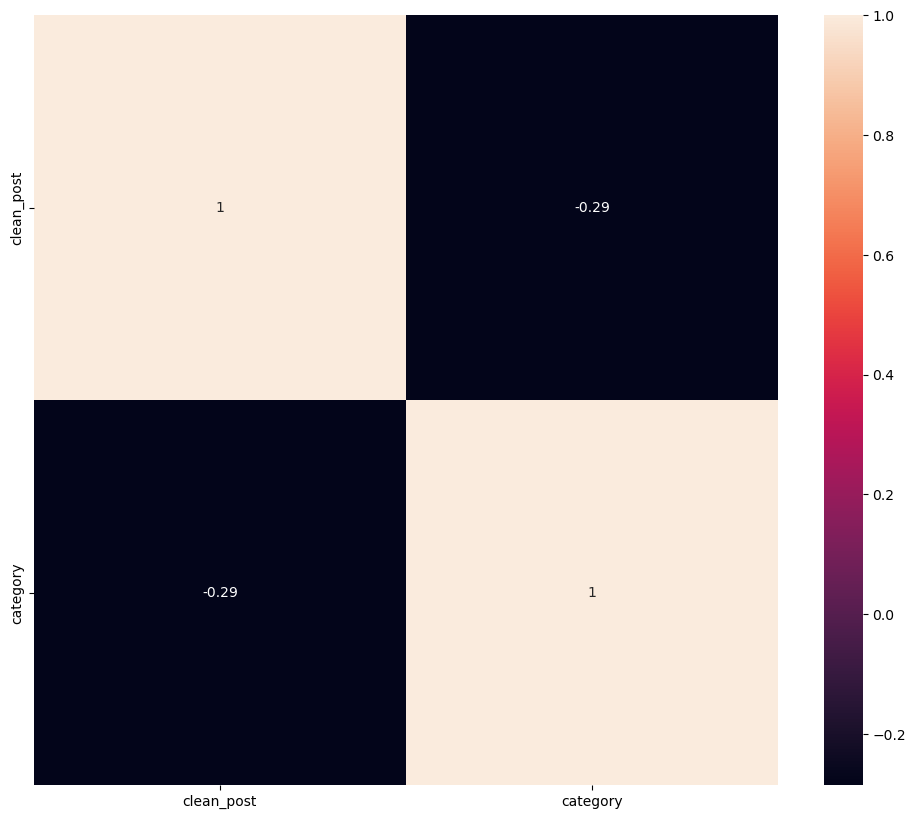

In [137]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


In [138]:
data.shape

(12847, 2)

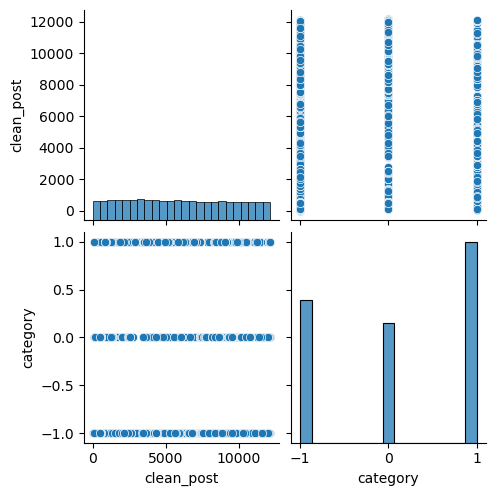

In [139]:
sns.pairplot(data=data)


# NLTK

In [140]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text


In [142]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [143]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [145]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [146]:
data

,clean_post,category
0,4615,-1.0
1,4159,0.0
2,3455,-1.0
3,3397,-1.0
4,3230,-1.0
...,...,...
12843,8394,-1.0
12844,10273,-1.0
12845,9398,-1.0
12846,8841,-1.0


In [147]:
y=data['category']
x=data.drop('category',axis=1)



# TRAINING AND TESTING DATA

In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)


# Feature Scaling

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [150]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


9635
3212
9635
3212


# ANN

In [151]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train,y_train,batch_size = 10,
    epochs=25,
)


Epoch 1/25
964/964 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.2559
Epoch 2/25
964/964 [==============================] - 2s 2ms/step - loss: -0.9199 - accuracy: 0.2560
Epoch 3/25
964/964 [==============================] - 2s 2ms/step - loss: -4.0089 - accuracy: 0.2560
Epoch 4/25
964/964 [==============================] - 2s 2ms/step - loss: -10.2716 - accuracy: 0.2560
Epoch 5/25
964/964 [==============================] - 2s 2ms/step - loss: -20.4296 - accuracy: 0.2560
Epoch 6/25
964/964 [==============================] - 2s 2ms/step - loss: -34.8813 - accuracy: 0.2560
Epoch 7/25
964/964 [==============================] - 2s 2ms/step - loss: -53.8192 - accuracy: 0.2560
Epoch 8/25
964/964 [==============================] - 2s 2ms/step - loss: -77.6596 - accuracy: 0.2560
Epoch 9/25
964/964 [==============================] - 2s 2ms/step - loss: -106.8141 - accuracy: 0.2560
Epoch 10/25
964/964 [==============================] - 2s 2ms/step - loss: -142.3753 

In [152]:
classifier.evaluate(x_test,y_test)

101/101 [==============================] - 0s 1ms/step - loss: -1844.6053 - accuracy: 0.2649


[-1844.6053466796875, 0.2649439573287964]

**MODELS**

**1. KNeighborsClassifier**



In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [154]:

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

        -1.0       0.44      0.29      0.35       965
         0.0       0.70      0.81      0.75       851
         1.0       0.72      0.83      0.77      1396

    accuracy                           0.66      3212
   macro avg       0.62      0.64      0.63      3212
weighted avg       0.63      0.66      0.64      3212

Confusion Matrix:
 [[ 278  270  417]
 [ 135  688   28]
 [ 213   20 1163]]
Training Score:
 74.84172288531396


In [155]:
knn.score(x_test,y_test)*100

66.2826899128269

**2. Naive Bayes**



In [156]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [157]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

        -1.0       0.34      0.05      0.08       965
         0.0       0.67      0.93      0.78       851
         1.0       0.68      0.92      0.78      1396

    accuracy                           0.66      3212
   macro avg       0.56      0.63      0.55      3212
weighted avg       0.57      0.66      0.57      3212

Confusion Matrix:
 [[  45  345  575]
 [  22  795   34]
 [  64   50 1282]]
Training Score:
 64.97145822522054


In [158]:
gnb.score(x_test,y_test)*100

66.06475716064757

**3. DECISION TREE CLASSIFIER**



In [159]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [160]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

        -1.0       0.68      0.06      0.12       965
         0.0       0.69      0.94      0.80       851
         1.0       0.69      0.98      0.81      1396

    accuracy                           0.69      3212
   macro avg       0.69      0.66      0.57      3212
weighted avg       0.69      0.69      0.60      3212

Confusion Matrix:
 [[  62  335  568]
 [  16  796   39]
 [  13   18 1365]]
Training Score:
 69.28905033731189


In [161]:
dtree.score(x_test,y_test)*100

69.20921544209216

**4.Random Forest Classifier**



In [162]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [163]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

        -1.0       0.43      0.41      0.42       965
         0.0       0.72      0.70      0.71       851
         1.0       0.73      0.76      0.75      1396

    accuracy                           0.64      3212
   macro avg       0.63      0.62      0.63      3212
weighted avg       0.64      0.64      0.64      3212

Confusion Matrix:
 [[ 400  216  349]
 [ 218  595   38]
 [ 320   16 1060]]
Training Score:
 99.4706798131811


**5. Logistic Regression**

In [164]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [165]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

        -1.0       0.29      0.14      0.19       965
         0.0       0.65      0.76      0.70       851
         1.0       0.68      0.85      0.76      1396

    accuracy                           0.61      3212
   macro avg       0.54      0.59      0.55      3212
weighted avg       0.56      0.61      0.57      3212

Confusion Matrix:
 [[ 135  293  537]
 [ 171  648   32]
 [ 154   50 1192]]
Training Score:
 99.4706798131811


In [166]:
reg.score(x_test,y_test)*100

61.48816936488169

In [167]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso


In [168]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [169]:
y_pred = lin_reg.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")



r2 Score of test set : 0.09439439791329773


In [170]:
lin_reg.intercept_


0.12122470160871825

In [171]:
lin_reg.coef_


array([-0.23689293])

In [172]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)


0.6493650504019934

In [173]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
3920,1.0,0.446289
5160,1.0,0.400286
5671,1.0,0.396012
11615,-1.0,-0.182826
6715,-1.0,0.237987
...,...,...
7718,-1.0,0.395333
12563,-1.0,-0.111243
1552,1.0,-0.081931
4364,1.0,0.497585
